In [3]:
import numpy as np

class Perceptron:
    def __init__(self,learning_rate = 0.001, iterations = 100) -> None:
        self.lr = learning_rate
        self.iters = iterations
        self.w = None
        self.bias = None


    def activation(self, X):
        return np.heaviside(X, 0)
    
    def fit(self,X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iters):
            for i in range(len(X)):
                z = np.dot(X, self.w) + self.bias
                y_p = self.activation(z)

                self.w = self.w -(self.lr * (y_p[i] - y[i])* X[i])
                self.bias = self.bias-(self.lr * (y_p[i] -y[i] ))

        return self.w, self.bias
        
    def predict(self, X):
        l = np.dot(X, self.w) + self.bias
        y_pred = self.activation(l)
        return y_pred
    
    
    

    
    


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2,random_state=2)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=123)

p = Perceptron(learning_rate=0.001, iterations=100)
p.fit(X_train,y_train)
prediction = p.predict(X_test)

print(accuracy_score(prediction, y_test))
print(confusion_matrix(prediction, y_test))




1.0
[[14  0]
 [ 0 16]]


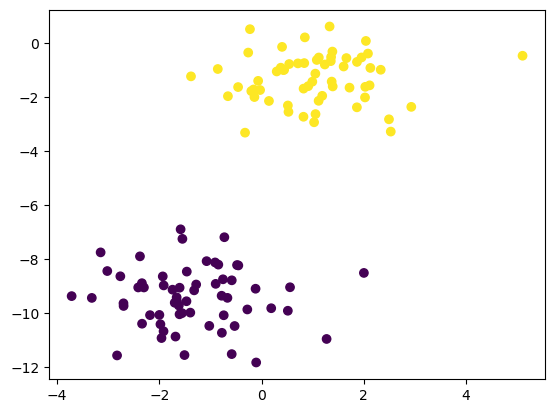

In [5]:
fig = plt.figure()
plt.scatter(X_train[:,0],X_train[:,1], marker='o', c=y_train )

